In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
base_path = r"C:\Users\CompuMarts\Desktop\ecommerceDB\Database"

file_names = [
    "categories",
    "customer_sessions",
    "customers",
    "discounts",
    "inventory_movements",
    "order_details",
    "orders",
    "payments",
    "products",
    "returns",
    "reviews",
    "shipping",
    "suppliers",
    "wishlists"
]

for name in file_names:
    file_path = fr"{base_path}\{name}.csv"
    globals()[f"df_{name}"] = pd.read_csv(file_path)

print(df_categories.head())
print(df_customers.head())


   id            name                                        description  \
0   1     Electronics  Forward generation section guess. Couple coach...   
1   2        Clothing  Player smile security doctor. Customer securit...   
2   3  Home & Kitchen  Green notice through parent buy what cup. Soon...   
3   4           Books  Leader better room send. Senior professor see....   
4   5          Sports  Add improve specific his contain charge indeed...   

   parent_id  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
   id first_name last_name                     email          phone  \
0   1     Andrew  Richards          cday@example.com   +10000000001   
1   2    Jessica     Carey   christine42@example.org  (442)730-0178   
2   3    Tiffany     Smith  bushdanielle@example.net     4147915635   
3   4    Ricardo    Warren     jessica43@example.net   +10000000004   
4   5      Jamie     Hicks        gclark@example.net   +10000000005   

                          

In [3]:
df_categories.head()

,id,name,description,parent_id
0,1,Electronics,Forward generation section guess. Couple coach...,NaN
1,2,Clothing,Player smile security doctor. Customer securit...,NaN
2,3,Home & Kitchen,Green notice through parent buy what cup. Soon...,NaN
3,4,Books,Leader better room send. Senior professor see....,NaN
4,5,Sports,Add improve specific his contain charge indeed...,NaN


In [4]:
print(df_categories.dtypes)

id               int64
name            object
description     object
parent_id      float64
dtype: object


In [5]:
df_customer_sessions.head()

,id,customer_id,session_start,session_end,ip_address
0,1,1,2025-01-26 00:37:34,2025-01-26 02:21:34,118.96.94.17
1,2,1,2024-06-22 19:21:25,2024-06-22 20:37:25,68.161.204.154
2,3,1,2024-07-01 19:05:50,2024-07-01 19:07:50,221.239.81.76
3,4,1,2024-07-21 19:43:09,2024-07-21 20:44:09,135.73.240.61
4,5,1,2025-02-25 12:05:38,2025-02-25 12:57:38,77.215.2.60


In [6]:
df_customer_sessions.dtypes

id                int64
customer_id       int64
session_start    object
session_end      object
ip_address       object
dtype: object

In [7]:
df_customer_sessions['session_start'] = df_customer_sessions['session_start'].astype('datetime64[ns]')
df_customer_sessions['session_end'] = df_customer_sessions['session_end'].astype('datetime64[ns]')

In [8]:
df_customer_sessions.dtypes

id                        int64
customer_id               int64
session_start    datetime64[ns]
session_end      datetime64[ns]
ip_address               object
dtype: object

In [9]:
df_customers.head()

,id,first_name,last_name,email,phone,address,registration_date
0,1,Andrew,Richards,cday@example.com,+10000000001,"PSC 6946, Box 4483\nAPO AE 45924",2024-02-29 13:00:01
1,2,Jessica,Carey,christine42@example.org,(442)730-0178,"981 Cross Spur\nPort Frank, MT 54743",2024-05-26 23:56:24
2,3,Tiffany,Smith,bushdanielle@example.net,4147915635,"PSC 1890, Box 8077\nAPO AP 84751",2024-07-03 02:00:45
3,4,Ricardo,Warren,jessica43@example.net,+10000000004,"246 Thomas Manor\nSarahmouth, KS 43770",2025-01-14 07:28:06
4,5,Jamie,Hicks,gclark@example.net,+10000000005,"624 Nelson Glens Suite 032\nEast Susanburgh, I...",2025-01-30 21:45:25


In [10]:
df_customers.dtypes

id                    int64
first_name           object
last_name            object
email                object
phone                object
address              object
registration_date    object
dtype: object

In [11]:
df_customers['registration_date'] = df_customers['registration_date'].astype('datetime64[ns]')

In [12]:
df_customers.dtypes

id                            int64
first_name                   object
last_name                    object
email                        object
phone                        object
address                      object
registration_date    datetime64[ns]
dtype: object

In [13]:
df_discounts.head()

,id,code,percentage,start_date,end_date,is_active,product_id,category_id,order_id
0,1,DISCOUNT-UNbg-3193,45,2025-05-03 22:51:05,2025-05-10 16:55:52,1,NaN,NaN,NaN
1,2,DISCOUNT-jNsD-9744,33,2025-04-29 07:23:12,2025-05-05 15:03:17,1,NaN,NaN,NaN
2,3,DISCOUNT-Cxww-5374,45,2025-04-21 05:24:21,2025-05-12 19:10:01,1,NaN,NaN,NaN
3,4,DISCOUNT-WcGm-1243,18,2025-04-18 12:55:19,2025-05-09 21:35:25,1,NaN,NaN,NaN
4,5,DISCOUNT-Wzqc-7134,39,2025-04-20 18:11:38,2025-05-18 07:44:06,1,NaN,NaN,NaN


In [14]:
df_discounts.dtypes

id               int64
code            object
percentage       int64
start_date      object
end_date        object
is_active        int64
product_id     float64
category_id    float64
order_id       float64
dtype: object

In [15]:
df_discounts['start_date'] = df_discounts['start_date'].astype('datetime64[ns]')
df_discounts['end_date'] = df_discounts['end_date'].astype('datetime64[ns]')

In [16]:
df_discounts.dtypes

id                      int64
code                   object
percentage              int64
start_date     datetime64[ns]
end_date       datetime64[ns]
is_active               int64
product_id            float64
category_id           float64
order_id              float64
dtype: object

In [17]:
df_discounts['is_active'].value_counts()

1    50
Name: is_active, dtype: int64

In [18]:
df_discounts.shape

(50, 9)

In [19]:
df_discounts['is_active'] = df_discounts['is_active'].astype('bool')

In [20]:
df_discounts.dtypes

id                      int64
code                   object
percentage              int64
start_date     datetime64[ns]
end_date       datetime64[ns]
is_active                bool
product_id            float64
category_id           float64
order_id              float64
dtype: object

In [21]:
df_discounts['product_id'].value_counts()

23.0    1
Name: product_id, dtype: int64

In [22]:
df_inventory_movements.head()

,id,product_id,quantity,movement_type,movement_date
0,1,1,449,purchase,2024-06-11 09:03:03
1,2,1,5,sale,2025-02-13 13:16:35
2,3,1,4,sale,2024-06-13 16:27:42
3,4,1,3,sale,2024-05-14 20:18:37
4,5,1,5,sale,2025-01-31 18:21:59


In [23]:
df_inventory_movements.dtypes

id                int64
product_id        int64
quantity          int64
movement_type    object
movement_date    object
dtype: object

In [24]:
df_inventory_movements['movement_date'] = df_inventory_movements['movement_date'].astype('datetime64[ns]')

In [25]:
df_inventory_movements.dtypes

id                        int64
product_id                int64
quantity                  int64
movement_type            object
movement_date    datetime64[ns]
dtype: object

In [26]:
df_inventory_movements['movement_type'].value_counts()

sale        29943
purchase     1003
Name: movement_type, dtype: int64

In [27]:
df_order_details.head()

,id,order_id,product_id,quantity,unit_price
0,1,1,967,4,71.67
1,2,1,426,2,145.02
2,3,2,995,5,297.62
3,4,3,942,3,553.77
4,5,3,123,1,553.91


In [28]:
df_order_details.dtypes

id              int64
order_id        int64
product_id      int64
quantity        int64
unit_price    float64
dtype: object

In [29]:
df_orders.head()

,id,customer_id,order_date,total_amount,status
0,1,3855,2024-05-26 17:25:05,576.72,processing
1,2,3654,2024-11-19 23:46:15,1488.10,pending
2,3,3791,2024-05-25 10:20:03,3561.47,cancelled
3,4,140,2025-02-24 13:03:09,2958.96,pending
4,5,4476,2024-07-29 02:22:13,6025.56,processing


In [30]:
df_orders.dtypes

id                int64
customer_id       int64
order_date       object
total_amount    float64
status           object
dtype: object

In [31]:
df_orders['order_date'] = df_orders['order_date'].astype('datetime64[ns]')

In [32]:
df_orders.dtypes

id                       int64
customer_id              int64
order_date      datetime64[ns]
total_amount           float64
status                  object
dtype: object

In [33]:
df_orders['status'].value_counts()

delivered     2049
cancelled     2012
shipped       1984
processing    1983
pending       1972
Name: status, dtype: int64

In [34]:
df_orders['status'] = df_orders['status'].astype('category')

In [35]:
df_orders.dtypes

id                       int64
customer_id              int64
order_date      datetime64[ns]
total_amount           float64
status                category
dtype: object

In [36]:
df_payments.head()

,id,order_id,customer_id,amount,payment_date,payment_method,status
0,1,1,3855,576.72,2024-05-26 18:13:05,paypal,completed
1,2,2,3654,1488.10,2024-11-20 00:24:15,bank_transfer,pending
2,3,4,140,2958.96,2025-02-24 13:09:09,paypal,pending
3,4,5,4476,6025.56,2024-07-29 02:47:13,bank_transfer,completed
4,5,6,646,6783.29,2025-03-02 07:44:45,credit_card,completed


In [37]:
df_payments.dtypes

id                  int64
order_id            int64
customer_id         int64
amount            float64
payment_date       object
payment_method     object
status             object
dtype: object

In [38]:
df_payments['payment_date'] = df_payments['payment_date'].astype('datetime64[ns]')

In [39]:
df_payments.dtypes

id                         int64
order_id                   int64
customer_id                int64
amount                   float64
payment_date      datetime64[ns]
payment_method            object
status                    object
dtype: object

In [40]:
df_payments['status'].value_counts()

completed    6016
pending      1972
Name: status, dtype: int64

In [41]:
df_payments['status'] = df_payments['status'].astype('category')

In [42]:
df_payments.dtypes

id                         int64
order_id                   int64
customer_id                int64
amount                   float64
payment_date      datetime64[ns]
payment_method            object
status                  category
dtype: object

In [43]:
df_products.head()

,id,name,description,price,category_id,supplier_id,sku,stock_quantity
0,1,Total methodical alliance,On walk once fish official. Follow senior thre...,128.32,17,6,SKU-3723-xRLF,374
1,2,Cloned 6thgeneration Graphic Interface,Scene record our paper forward. Yes full speci...,823.94,6,24,SKU-3518-wBrp,183
2,3,Synchronized client-driven migration,We entire senior current speak it key.\nBuildi...,145.68,20,13,SKU-9128-OgDT,66
3,4,Right-sized intangible knowledgebase,Western coach shoulder relate step test bit. I...,296.91,13,38,SKU-0638-lKgb,530
4,5,Robust clear-thinking service-desk,Must fire audience section fish girl opportuni...,928.55,8,18,SKU-3899-haHw,676


In [44]:
df_products.dtypes

id                  int64
name               object
description        object
price             float64
category_id         int64
supplier_id         int64
sku                object
stock_quantity      int64
dtype: object

In [45]:
df_returns.head()

,id,order_id,return_date,reason,status
0,1,112,2024-10-10 20:38:00,Changed mind,completed
1,2,178,2025-02-27 15:01:15,Wrong item,pending
2,3,389,2025-05-06 14:08:03,Changed mind,approved
3,4,438,2024-08-17 00:22:06,Size issue,completed
4,5,537,2024-07-10 00:15:55,Defective product,approved


In [46]:
df_returns.dtypes

id              int64
order_id        int64
return_date    object
reason         object
status         object
dtype: object

In [47]:
df_returns['return_date'] = df_returns['return_date'].astype('datetime64[ns]')
df_returns['status'] = df_returns['status'].astype('category')

In [48]:
df_returns.dtypes

id                      int64
order_id                int64
return_date    datetime64[ns]
reason                 object
status               category
dtype: object

In [49]:
df_returns['status'].value_counts()

pending      30
rejected     27
approved     24
completed    22
Name: status, dtype: int64

In [50]:
df_reviews.head()

,id,product_id,customer_id,rating,comment,review_date
0,1,1,1767,4,Do effort citizen daughter. Dinner seem day co...,2025-05-01 00:34:48
1,2,1,727,4,Travel up media down.\nMessage see can ok thro...,2025-03-31 18:51:31
2,3,1,4418,5,Behind nearly democratic professional various....,2024-08-07 17:36:15
3,4,1,1707,5,Weight without practice north truth. Head indu...,2024-12-07 02:58:56
4,5,1,3874,1,Family here someone truth. Issue mission discu...,2024-06-22 12:12:38


In [51]:
df_reviews.dtypes

id              int64
product_id      int64
customer_id     int64
rating          int64
comment        object
review_date    object
dtype: object

In [52]:
df_reviews['review_date'] = df_reviews['review_date'].astype('datetime64[ns]')

In [53]:
df_reviews.dtypes

id                      int64
product_id              int64
customer_id             int64
rating                  int64
comment                object
review_date    datetime64[ns]
dtype: object

In [54]:
df_shipping.head()

,id,order_id,shipping_date,tracking_number,carrier,status
0,1,12,2025-02-15 22:17:17,TRK-85694554-hRDd,FedEx,delivered
1,2,13,2024-09-22 20:32:08,TRK-49382436-rboo,USPS,delivered
2,3,16,2024-09-09 09:03:41,TRK-36283004-CPra,USPS,in_transit
3,4,20,2024-10-23 10:56:21,TRK-57562111-mais,UPS,in_transit
4,5,21,2024-12-18 00:29:46,TRK-88889834-PEXW,FedEx,delivered


In [55]:
df_shipping.dtypes

id                  int64
order_id            int64
shipping_date      object
tracking_number    object
carrier            object
status             object
dtype: object

In [56]:
df_shipping['shipping_date'] = df_shipping['shipping_date'].astype('datetime64[ns]')
df_shipping['status'] = df_shipping['status'].astype('category')

In [57]:
df_shipping.dtypes

id                          int64
order_id                    int64
shipping_date      datetime64[ns]
tracking_number            object
carrier                    object
status                   category
dtype: object

In [58]:
df_shipping['carrier'].value_counts()

UPS      1038
DHL      1023
FedEx     988
USPS      984
Name: carrier, dtype: int64

In [59]:
df_shipping['carrier'] = df_shipping['carrier'].astype('category')

In [60]:
df_shipping.dtypes

id                          int64
order_id                    int64
shipping_date      datetime64[ns]
tracking_number            object
carrier                  category
status                   category
dtype: object

In [61]:
df_suppliers.head()

,id,name,contact_person,email,phone,address
0,1,"Maxwell, Garcia and Johnson",Jacob Lowe,fisherthomas@example.net,(639)475-1574x20468,"45629 Jones Estate Apt. 321\nNorth Debbie, SD ..."
1,2,Price Group,Stacy Green,judy62@example.net,+1-528-997-7196x28387,"761 Jamie Passage Suite 387\nChristinastad, TN..."
2,3,Pennington Inc,Elizabeth Carlson,bryan05@example.org,713.857.6834,"99298 Christian Views\nWest Julieport, VT 57887"
3,4,"Johnson, Gonzalez and James",Lindsey Smith,kevin58@example.org,454.948.7160x860,"546 Garner Point Apt. 587\nTylerfurt, CA 79130"
4,5,Nguyen PLC,Mark Hunt,benjaminturner@example.net,601.953.6270x870,"45392 Conner Overpass Apt. 994\nWest Michael, ..."


In [62]:
df_suppliers.dtypes

id                 int64
name              object
contact_person    object
email             object
phone             object
address           object
dtype: object

In [63]:
df_wishlists.head()

,id,customer_id,product_id,added_date
0,1,1,75,2025-02-07 09:02:54
1,2,1,663,2024-08-04 21:43:45
2,3,1,601,2024-12-29 10:04:04
3,4,1,509,2024-09-12 22:37:30
4,5,1,729,2024-08-22 12:49:47


In [64]:
df_wishlists.dtypes

id              int64
customer_id     int64
product_id      int64
added_date     object
dtype: object

In [65]:
df_wishlists['added_date'] = df_wishlists['added_date'].astype('datetime64[ns]')

In [66]:
df_wishlists.dtypes

id                      int64
customer_id             int64
product_id              int64
added_date     datetime64[ns]
dtype: object

In [67]:
null_report = []

for name in file_names:
    df_name = f"df_{name}"
    df = globals().get(df_name)
    if df is not None:
        null_counts = df.isnull().sum()
        for col, count in null_counts.items():
            if count > 0:
                null_report.append({
                    "DataFrame": df_name,
                    "Column": col,
                    "Null Count": count
                })

null_df = pd.DataFrame(null_report).sort_values(by=["DataFrame", "Null Count"], ascending=[True, False])

print(null_df.to_string(index=False))

    DataFrame      Column  Null Count
df_categories   parent_id           5
 df_discounts category_id          50
 df_discounts    order_id          50
 df_discounts  product_id          49


In [68]:
duplicates_report = []

for name in file_names:
    df_name = f"df_{name}"
    df = globals().get(df_name)
    if df is not None:
        duplicate_count = df.duplicated().sum()
        duplicates_report.append({
            "DataFrame": df_name,
            "Duplicate_Rows": duplicate_count
        })

duplicates_df = pd.DataFrame(duplicates_report)

if duplicates_df["Duplicate_Rows"].sum() == 0:
    print("No duplicate rows found in any DataFrame.")
else:
    print(duplicates_df.sort_values(by="Duplicate_Rows", ascending=False).to_string(index=False))

No duplicate rows found in any DataFrame.


In [69]:
columns_dict = {}
for name in file_names:
    df_name = f"df_{name}"
    df = globals().get(df_name)
    if df is not None and isinstance(df, pd.DataFrame):
        columns_dict[name] = df.columns.tolist()
    else:
        columns_dict[name] = ["[Not Loaded]"]

max_len = max(len(cols) for cols in columns_dict.values())
for key in columns_dict:
    columns_dict[key] += [""] * (max_len - len(columns_dict[key]))

columns_df = pd.DataFrame(columns_dict)
print(columns_df)

    categories customer_sessions          customers    discounts  \
0           id                id                 id           id   
1         name       customer_id         first_name         code   
2  description     session_start          last_name   percentage   
3    parent_id       session_end              email   start_date   
4                     ip_address              phone     end_date   
5                                           address    is_active   
6                                 registration_date   product_id   
7                                                    category_id   
8                                                       order_id   

  inventory_movements order_details        orders        payments  \
0                  id            id            id              id   
1          product_id      order_id   customer_id        order_id   
2            quantity    product_id    order_date     customer_id   
3       movement_type      quantity  total_

Sales Forecasting

Columns used for this : orders, order_details, payments, shipping_date


Goal: Predict future revenue, order volume, or inventory needs

In [70]:
df_orders.rename(columns={'id':'order_id'}, inplace = True)
df_orders.head(5)

,order_id,customer_id,order_date,total_amount,status
0,1,3855,2024-05-26 17:25:05,576.72,processing
1,2,3654,2024-11-19 23:46:15,1488.10,pending
2,3,3791,2024-05-25 10:20:03,3561.47,cancelled
3,4,140,2025-02-24 13:03:09,2958.96,pending
4,5,4476,2024-07-29 02:22:13,6025.56,processing


In [71]:
print(df_orders.columns.tolist())
print(df_payments.columns.tolist())

['order_id', 'customer_id', 'order_date', 'total_amount', 'status']
['id', 'order_id', 'customer_id', 'amount', 'payment_date', 'payment_method', 'status']


In [72]:
df_orders_payments = pd.merge(df_orders, df_payments, on='order_id')
df_orders_payments['order_date'] = pd.to_datetime(df_orders_payments['order_date'])
daily_sales = df_orders_payments.groupby('order_date')['amount'].sum().reset_index()
daily_sales = daily_sales.sort_values('order_date')

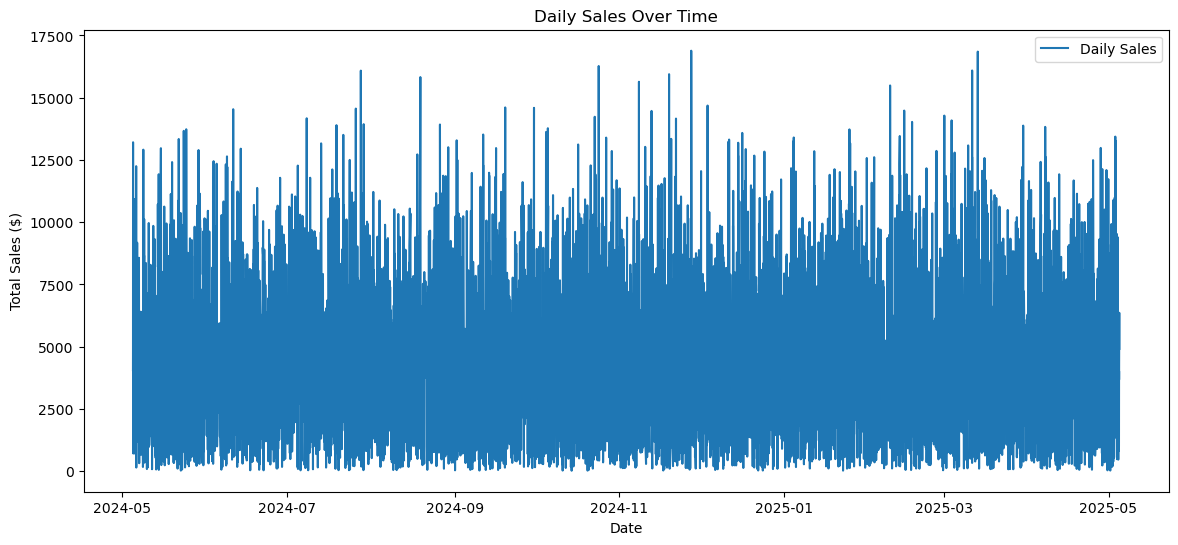

In [73]:
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['order_date'], daily_sales['amount'], label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

11:41:56 - cmdstanpy - INFO - Chain [1] start processing
11:41:56 - cmdstanpy - INFO - Chain [1] done processing


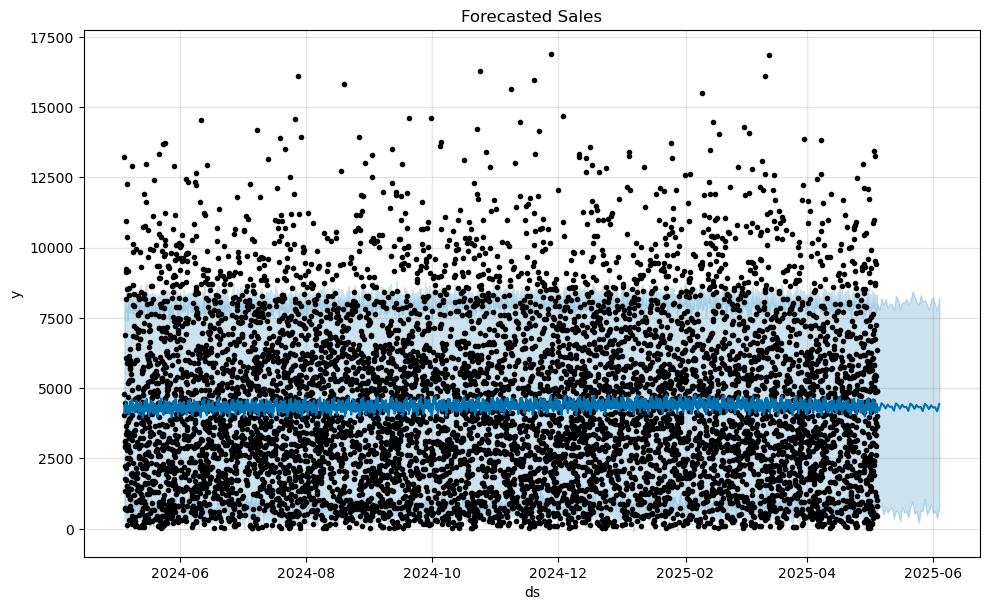

In [74]:
df_prophet = daily_sales.rename(columns={'order_date': 'ds', 'amount': 'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Forecasted Sales")
plt.show()

11:41:58 - cmdstanpy - INFO - Chain [1] start processing
11:41:58 - cmdstanpy - INFO - Chain [1] done processing


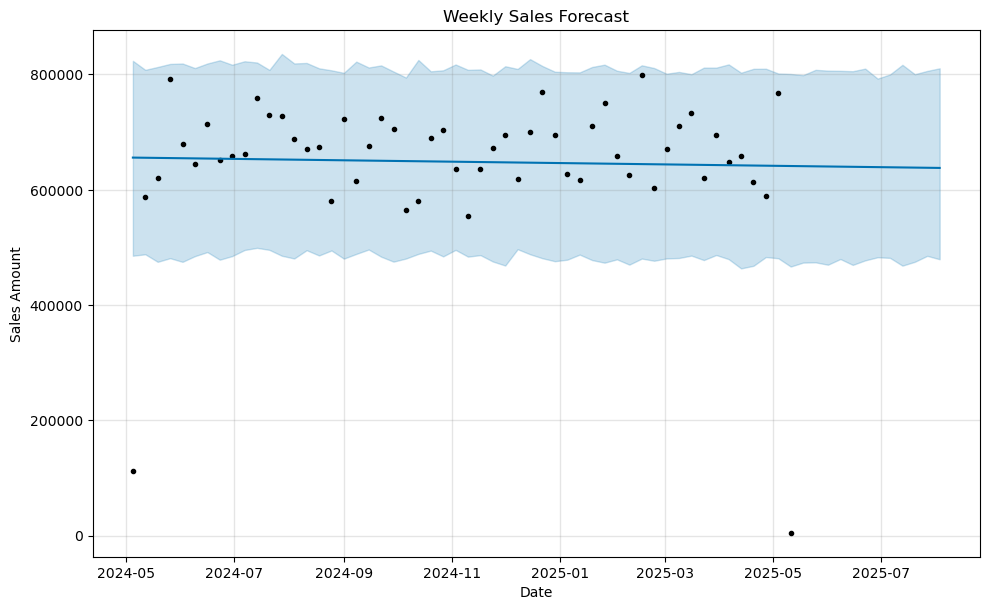

In [75]:
daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])
daily_sales.set_index('order_date', inplace=True)
weekly_sales = daily_sales['amount'].resample('W').sum().reset_index()
weekly_sales.rename(columns={'order_date': 'ds', 'amount': 'y'}, inplace=True)
model = Prophet()
model.fit(weekly_sales)
future = model.make_future_dataframe(periods=12, freq='W')

forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

Trend: Sales peaked around mid-2024, declined, and are now stabilizing (or slightly rising).

Forecast: Expected to remain steady (~400k–500k/week) with no drastic growth/decline.

In [76]:
snapshot_date = df_orders['order_date'].max() + pd.DateOffset(days=1)
print(snapshot_date)

2025-05-06 00:00:00


In [77]:
rfm = df_orders.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'customer_id': 'count',                                  # Frequency
    'total_amount': 'sum'                                    # Monetary
})

In [78]:
rfm.columns = ['recency', 'frequency', 'total_money']

In [79]:
rfm

,recency,frequency,total_money
customer_id,,,
2,180,1,3577.31
4,162,2,6132.06
5,16,3,15108.14
6,26,2,8976.33
7,316,1,5857.46
...,...,...,...
4996,116,2,9333.83
4997,173,2,9399.23
4998,104,3,7946.24


In [80]:
rfm['recency_score'] = pd.qcut(rfm['recency'], q=5, labels=[5, 4, 3, 2, 1], )
rfm['frequency_score'] = pd.cut(
    rfm['frequency'],
    bins=[0, 1, 2, 3, 5, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)
rfm['monetary_score'] = pd.qcut(rfm['total_money'], q=5, labels=[1, 2, 3, 4, 5])

# Combine scores into rfm score
rfm['rfm_score'] = rfm['recency_score'].astype(int) + rfm['frequency_score'].astype(int) + rfm['monetary_score'].astype(int)

In [81]:
segmentation_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[3-5][3-5][3-5]': 'Loyal',
    r'[2-5][2-5][2-5]': 'Potential',
    r'[1-5][1-5][1-5]': 'New',
    r'[1-2][1-2][1-2]': 'At Risk',
    r'[1-2][1-2][1-3]': 'Hibernating',
    r'[1][1-5][1-5]': 'Lost'
}

rfm['segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)
rfm['segment'] = rfm['segment'].replace(segmentation_map, regex=True)

In [82]:
rfm

,recency,frequency,total_money,recency_score,frequency_score,monetary_score,rfm_score,segment
customer_id,,,,,,,,
2,180,1,3577.31,2,2,1,5,New
4,162,2,6132.06,2,3,2,7,Potential
5,16,3,15108.14,5,4,4,13,Champions
6,26,2,8976.33,5,3,3,11,Loyal
7,316,1,5857.46,1,2,2,5,New
...,...,...,...,...,...,...,...,...
4996,116,2,9333.83,3,3,3,9,Loyal
4997,173,2,9399.23,2,3,3,8,Potential
4998,104,3,7946.24,3,4,3,10,Loyal


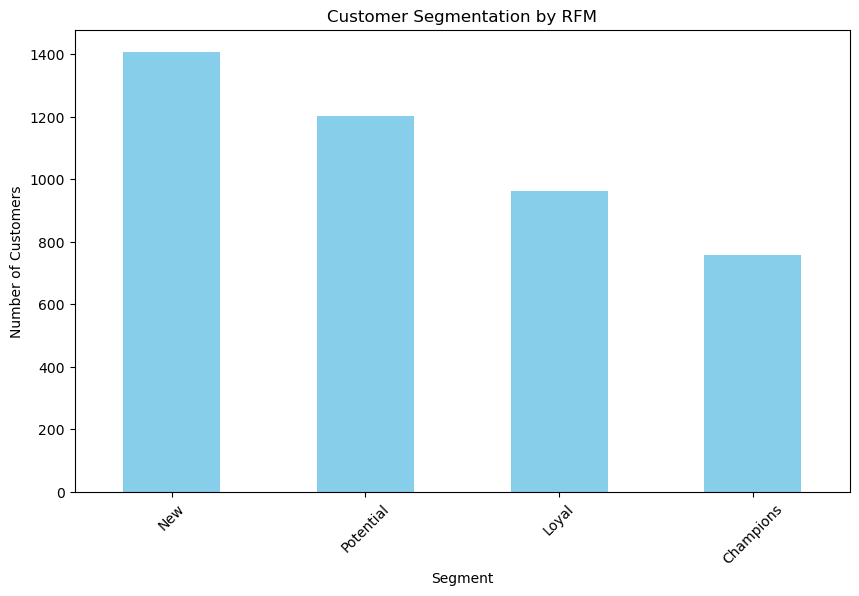

In [83]:
segment_counts = rfm['segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [84]:
rfm = rfm.reset_index()

segment_sales = df_orders.merge(
    rfm[['customer_id', 'segment']], 
    on='customer_id'
)

# Sum sales by segment
sales_by_segment = segment_sales.groupby('segment')['total_amount'].sum().reset_index()

In [85]:
sales_by_segment

,segment,total_amount
0,Champions,14357305.10
1,Loyal,12211449.65
2,New,6828342.00
3,Potential,10420295.31


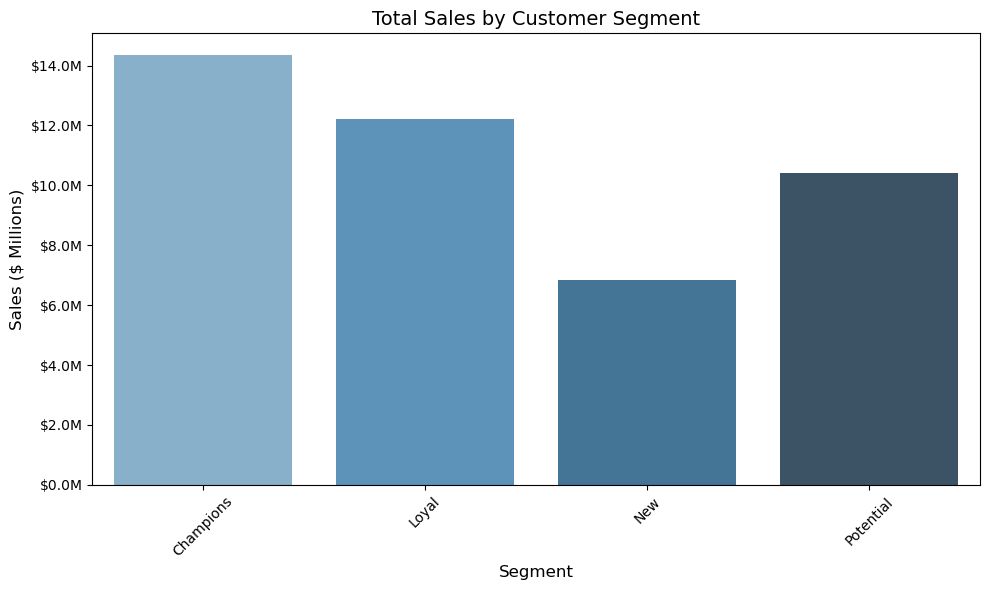

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=sales_by_segment,
    x='segment',
    y='total_amount',
    palette='Blues_d'
)

# Format Y-axis to show values in millions
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Total Sales by Customer Segment', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Sales ($ Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [87]:
print(df_shipping.columns)
print(df_orders.columns)
print(df_payments.columns)
print(df_inventory_movements.columns)

Index(['id', 'order_id', 'shipping_date', 'tracking_number', 'carrier',
       'status'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_date', 'total_amount', 'status'], dtype='object')
Index(['id', 'order_id', 'customer_id', 'amount', 'payment_date',
       'payment_method', 'status'],
      dtype='object')
Index(['id', 'product_id', 'quantity', 'movement_type', 'movement_date'], dtype='object')


In [88]:
df_shipping_merged = (
    df_shipping
    .merge(df_orders[['order_id', 'order_date']], on='order_id', how='left')
    .merge(df_payments[['order_id', 'payment_date']], on='order_id', how='left')
)

In [89]:
df_order_products = df_order_details[['order_id', 'product_id']]

In [90]:
df_movements_joined = pd.merge(
    df_order_products, 
    df_inventory_movements[['product_id', 'movement_date']], 
    on='product_id', 
    how='left'
)

In [91]:
df_full = pd.merge(
    df_shipping_merged,
    df_movements_joined,
    on='order_id',
    how='left'
)

In [92]:
df_full['shipping_date'] = pd.to_datetime(df_full['shipping_date'])
df_full['order_date'] = pd.to_datetime(df_full['order_date'])
df_full['payment_date'] = pd.to_datetime(df_full['payment_date'])
df_full['movement_date'] = pd.to_datetime(df_full['movement_date'])

df_full['order_to_ship'] = (df_full['shipping_date'] - df_full['order_date']).dt.days
df_full['payment_to_ship'] = (df_full['shipping_date'] - df_full['payment_date']).dt.days
df_full['payment_to_inventory'] = (df_full['movement_date'] - df_full['payment_date']).dt.days

# Target label: delayed if shipping takes more than 1 days from payment
df_full['is_delayed'] = (df_full['payment_to_ship'] > 1).astype(int)

In [93]:
X = df_full[['order_to_ship', 'payment_to_ship', 'payment_to_inventory']].fillna(0)
y = df_full['is_delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50697
           1       1.00      1.00      1.00     26059

    accuracy                           1.00     76756
   macro avg       1.00      1.00      1.00     76756
weighted avg       1.00      1.00      1.00     76756



Model is predicting to well and that mains that mybe the problem is too easy or  maybe because the model is using order_to_ship or payment_to_ship and this is making it too easy for prediction 